<a href="https://colab.research.google.com/github/nerdk312/CS294--158-Deep-Unsupervised-Learning/blob/master/Autoregressive_models_HW1_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on solution from:
https://github.com/davidsandberg/unsupervised/blob/master/HW1/HW1_1.ipynb

In [1]:
!pip uninstall tensorflow
!pip install tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 86.3MB 39kB/s 
     |████████████████████████████████| 3.8MB 51.2MB/s 
     |████████████████████████████████| 450kB 48.8MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 whi

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Fitting a model consists of 4 steps

1.   Defining a model
2.   Defining a loss function
3.   Obtaining training data
4.   Run through the training data and use an 'optimizer' to adjust variables to fit the data


In [0]:
theta = tf.Variable(tf.zeros(100,1),shape = (100,))#dtype =float32) # Nawid- Initialised the values

def p(x):
  softmax_outputs = tf.math.softmax(theta)
  
  probability = tf.gather(softmax_outputs, x) # Nawid - This orders the softmax tensor corresponding to the values in the input tensor
  
  return probability

def nll(inputs): # Nawid - Computes the negative loglikelihood loss
  probabilty_values =  p(inputs) # Nawid - Computes all the probability values using tf.gather
  return -tf.math.reduce_mean(tf.math.log(probabilty_values)/tf.math.log(2.0)) # Nawid - Computes the negative log-likelihood  and then divides by log(2) to get the answer in bits

#def bit_conversion(x):
  #bit_value = tf.math.log(x)/tf.math.log(2)
  #return bit_value



In [0]:
def sample_data():
  count = 10000
  rand = np.random.RandomState(0)
  a = 0.3 + 0.1 * rand.randn(count)
  b = 0.8 + 0.05 * rand.randn(count)
  mask = rand.rand(count) < 0.5
  samples = np.clip(a * mask + b * (1 - mask), 0.0, 1.0)
  return np.digitize(samples, np.linspace(0.0, 1.0, 100))

In [0]:
samples = sample_data()
train_data = samples[0:7000] # Nawid- Training set
#train_set = set(samples)
#print(train_set)
#print(train_data.shape)
val_data = samples[7000:8000] # Nawid - Validation data
test_data = samples[8000::] # Nawid - 20 % for test set

# Nawid -  Convert the training and the test data into tensors
#train_data = tf.convert_to_tensor(train_data) 
#val_data = tf.convert_to_tensor(test_data)
#test_data = tf.convert_to_tensor(test_data)

In [0]:
def create_dataset(data,batch_size):
  dataset = tf.data.Dataset.from_tensor_slices(data)
  #dataset = dataset.repeat()# # Nawid-  Repeats the dataset indefinitely
  dataset = dataset.shuffle(10000) # Shuffle the data
  dataset = dataset.batch(batch_size) # Create batches of data
  dataset = dataset.prefetch(batch_size) # Prefetch data for faster consumption
  return dataset
  


# Create dataset

In [0]:
batch_no = 100
train_iterator = create_dataset(train_data,batch_no)
val_iterator = create_dataset(val_data,batch_no)
test_iterator = create_dataset(test_data,batch_no)

# Histogram of the data

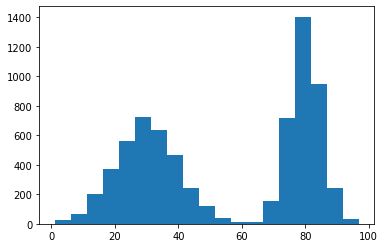

In [134]:
_ = plt.hist(train_data, bins='auto') 
plt.show()

# Define a training loop

###Calculates the gradient used to optimize the model

In [0]:
def grad(inputs):
  with tf.GradientTape() as t:
    loss_value = nll(inputs)
  return loss_value, t.gradient(loss_value, [theta]) #  Nawid - Need to place 

####Create an optimizer

In [0]:
optimizer = tf.keras.optimizers.Adam()

In [137]:
train_loss_epoch = []
val_loss_epoch =[]

index = 0
for epoch in range(1,100+1):
  train_loss_batch = []
  val_loss_batch = []
  for x_data in train_iterator: # Nawid - Iterates through all the different batches
    loss_train, grads = grad(x_data)
    optimizer.apply_gradients(zip(grads, [theta])) # Nawid - Updates the theta values using the gradients and the Adam optimizer
    #loss_train_bit = bit_conversion(loss_train)
    train_loss_batch.append(loss_train)
  mean_train_loss = tf.math.reduce_mean(train_loss_batch)
  train_loss_epoch.append(mean_train_loss)
    
  print('train epoch: %d loss: %.3f' % (epoch, loss_train))
  for x_val in val_iterator:
    loss_val, _ = grad(x_val)
    
    val_loss_batch.append(loss_val)
    
  mean_val_loss = tf.math.reduce_mean(val_loss_batch)
  val_loss_epoch.append(mean_val_loss)
  

  print('val epoch : %d loss: %.3f' %(epoch, loss_val))  

train epoch: 1 loss: 6.578
val epoch : 1 loss: 6.575
train epoch: 2 loss: 6.509
val epoch : 2 loss: 6.510
train epoch: 3 loss: 6.455
val epoch : 3 loss: 6.478
train epoch: 4 loss: 6.403
val epoch : 4 loss: 6.415
train epoch: 5 loss: 6.350
val epoch : 5 loss: 6.319
train epoch: 6 loss: 6.336
val epoch : 6 loss: 6.334
train epoch: 7 loss: 6.250
val epoch : 7 loss: 6.286
train epoch: 8 loss: 6.263
val epoch : 8 loss: 6.234
train epoch: 9 loss: 6.177
val epoch : 9 loss: 6.195
train epoch: 10 loss: 6.196
val epoch : 10 loss: 6.189
train epoch: 11 loss: 6.140
val epoch : 11 loss: 6.142
train epoch: 12 loss: 6.183
val epoch : 12 loss: 6.149
train epoch: 13 loss: 6.122
val epoch : 13 loss: 6.136
train epoch: 14 loss: 6.102
val epoch : 14 loss: 5.974
train epoch: 15 loss: 6.097
val epoch : 15 loss: 5.981
train epoch: 16 loss: 6.052
val epoch : 16 loss: 6.005
train epoch: 17 loss: 6.149
val epoch : 17 loss: 6.037
train epoch: 18 loss: 5.920
val epoch : 18 loss: 5.959
train epoch: 19 loss: 5.994


Repeatedly run through the training data and see how theta changes

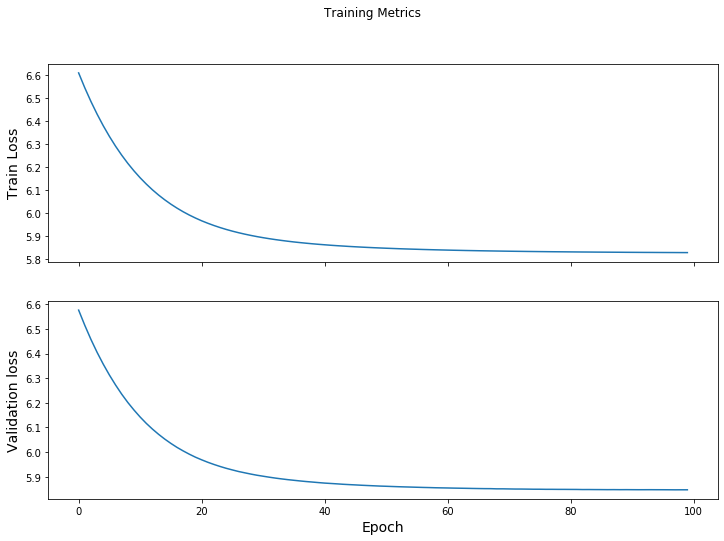

In [138]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Train Loss", fontsize=14)
axes[0].plot(train_loss_epoch)

axes[1].set_ylabel("Validation loss", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(val_loss_epoch)
plt.show()

In [75]:
print(p(1))

tf.Tensor(0.00070789637, shape=(), dtype=float32)


In [107]:
x_values = np.arange(0,100)
#print(x_values)
print(p(x_values))
#numpy.random.choice(numpy.arange(1, 7), p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2])


#ax.set(xlim=(1, 100), ylim=(0, 1))


tf.Tensor(
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01], shape=(100,), dtype=float32)
tf.Tensor(
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.

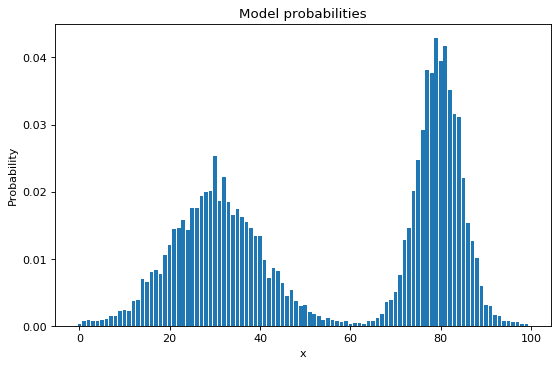

tf.Tensor(1.0, shape=(), dtype=float32)


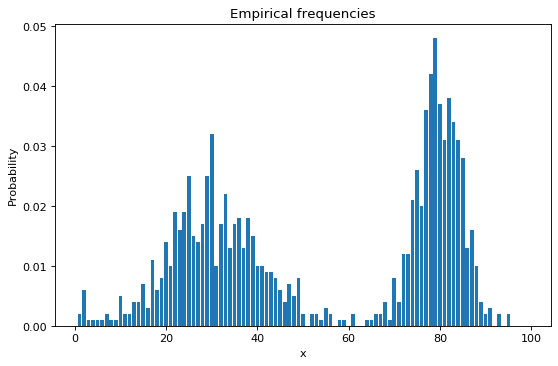

In [150]:
plt.figure(figsize=(8, 5), dpi= 80)
x = np.arange(0,100) # Nawid - All the different indices present
prob_ = p(x) 

plt.bar(x, prob_)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Model probabilities')
#ax = plt.gca() # Nawid - This is used to specify the axis object
#ax.set(xlim=(1, 100), ylim=(0, 1)) # Nawid - This is used to specify the limits of the axis
plt.show()

print(tf.keras.backend.sum(prob_,axis=-1)) # Nawid - Used to ensure probability adds to 1
y = np.random.choice(100, size=(1000,), p=prob_)

plt.figure(figsize=(8, 5), dpi= 80)
'''
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Empirical frequencies')
_ = plt.hist(y, bins='auto') 
'''
a, b = np.histogram(y, bins=np.arange(1,101))
z = np.arange(1,100)
plt.bar(z, a / np.sum(a))
plt.xlabel('x')
plt.ylabel('Probability')
_ = plt.title('Empirical frequencies')
